<a href="https://colab.research.google.com/github/diptaban/KMeans/blob/main/AIML_LAB_6_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Means Clustering**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


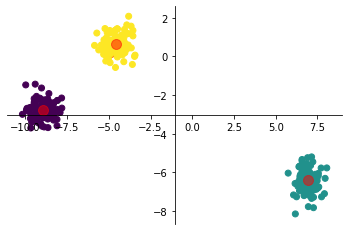

In [1]:
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax = fig.add_subplot(1, 1, 1)

#m = 300 # total number of data
#np.random.seed(180)
#X = np.random.rand(m,2)
#X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,\
                       cluster_std=0.50, random_state=15)
#plt.scatter(X[:,0],X[:,1]);

K = 3;
centroids =np.zeros((K,np.shape(X)[1]));
for i in range(K):
  #centroids[i,:]=X[np.random.randint(np.shape(X)[0]),:]
  centroids[i,:]=X[i,:]
  plt.scatter(centroids[i,0],centroids[i,1])
#print(centroids)  

for iter in range(100):
  classification = []
  d={}
  for i in range(K):
      d[i]=[]
      #print(d)
  for data in X:
    distance = []
    for i in range(K):
      
      distance.append((sum((data - centroids[i,:])**2)**0.5))# Frobeniuos norm
      #distance.append(np.linalg.norm(data-centroids[i,:]))
    idx = distance.index(min(distance))
    d[idx].append(data)
    classification.append(idx)


  for i in range(K):
    centroids[i,:] = np.average(d[i],axis=0)
#print(centroids)
#print(X)
#print(classification)
#print(np.average(d[0],axis=0))
#print(np.average(d[1],axis=0))
plt.scatter(X[:,0],X[:,1],c=classification);
for i in range(K):
  
  plt.scatter(centroids[i,0],centroids[i,1],c='red',s=100,alpha=0.5)




In [2]:
print(d[0])
print(centroids[0,:])
print(np.linalg.norm(centroids[0,:]-d[0])) # broadcasting in python

[array([-9.0644473 , -2.82495246]), array([-8.08854273, -2.27642953]), array([-8.14879567, -2.86941685]), array([-9.41639774, -2.97855128]), array([-9.47388366, -2.37200061]), array([-8.86993956, -2.36652082]), array([-8.51086713, -2.89888316]), array([-9.33081651, -2.81109502]), array([-9.37190288, -3.342419  ]), array([-8.45182827, -3.12894046]), array([-8.52745718, -2.97001881]), array([-8.33062781, -2.68392119]), array([-9.09790539, -3.52503424]), array([-8.3430157 , -2.57502477]), array([-9.01632173, -2.5337589 ]), array([-9.22606051, -2.86917165]), array([-8.47226992, -2.88994438]), array([-9.13036287, -2.16022842]), array([-8.31291415, -2.42535473]), array([-8.82423159, -3.09494803]), array([-8.52179577, -2.44619975]), array([-8.31551814, -3.29464734]), array([-8.4539065 , -3.15844288]), array([-9.5362688 , -2.64049872]), array([-9.52710271, -2.57872908]), array([-8.94573965, -3.18284579]), array([-8.37979796, -2.79625411]), array([-9.15120754, -2.77700941]), array([-9.27050599,

## **Choosing K : Elbow Method**

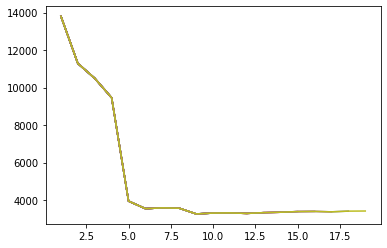

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=7,cluster_std=0.50, random_state=15)
#plt.scatter(X[:,0],X[:,1]);

TWCSS = []
clusters = []
for K in range(1,20):
  WCSS = []
  centroids =np.zeros((K,np.shape(X)[1]));
  for i in range(K):
    #centroids[i,:]=X[np.random.randint(np.shape(X)[0]),:]
    centroids[i,:]=X[i,:]


  for iter in range(100):
    classification = []
    d={}
    for i in range(K):
        d[i]=[]
        #print(d)
    for data in X:
      distance = []
      for i in range(K):
        
        distance.append((sum((data - centroids[i,:])**2)**0.5))# Frobeniuos norm
        #distance.append(np.linalg.norm(data-centroids[i,:]))
      idx = distance.index(min(distance))
      d[idx].append(data)
      classification.append(idx)


    for i in range(K):
      centroids[i,:] = np.average(d[i],axis=0)
      WCSS.append(np.linalg.norm(centroids[i,:]-d[i]))
  TWCSS.append(sum(WCSS))
  clusters.append(K)    

  plt.plot(clusters,TWCSS)

[13805.49101840339, 11290.031432116406, 10494.045894296907, 9457.951953629321, 3944.3967754186065, 3543.341939827876, 3584.4032000813427, 3565.6036505613606, 3261.753180063236, 3306.672792281581, 3315.1427971680464, 3288.3502381215476, 3330.1244592312764, 3351.354323152237, 3387.541501488994, 3395.0914964044377, 3373.74648706293, 3410.081448915878, 3416.5184680247635]


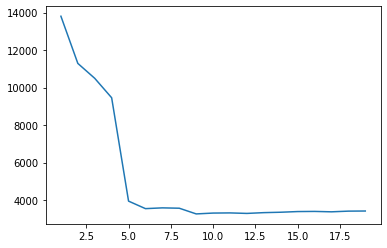

In [4]:
print(TWCSS)
plt.plot(clusters,TWCSS)

In [5]:
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

[1 0 3 0 1 1 2 3 0 0 2 0 3 0 1 3 3 1 2 2 1 1 3 2 2 3 1 3 2 3 0 0 3 0 0 0 0
 0 2 1 3 2 3 3 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 3 0 2 2 2 0 1 0 2 3 2 0 2
 2 0 2 3 1 0 1 3 1 1 0 3 1 3 0 0 3 1 0 2 2 3 1 1 3 2 0 1 0 1 3 1 1 3 0 3 2
 2 1 0 1 3 0 1 1 3 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 3 0 0 2 3 2 3 2 0 3
 0 0 0 3 0 3 1 2 0 2 1 3 0 3 3 1 3 2 2 3 1 3 3 0 1 3 2 0 1 1 3 2 1 3 2 2 3
 3 3 3 1 0 3 2 3 3 2 2 2 3 2 0 3 2 1 2 3 0 2 0 3 0 3 2 3 3 0 2 2 1 1 3 0 1
 1 2 1 2 3 0 0 3 3 0 3 1 2 3 1 2 0 2 1 3 1 0 0 0 0 2 2 0 3 2 1 3 2 2 2 1 1
 0 3 3 2 1 0 2 3 0 3 1 1 2 2 3 1 1 1 3 0 0 1 1 3 1 1 1 0 2 0 3 1 1 0 0 0 1
 1 3 0 2]


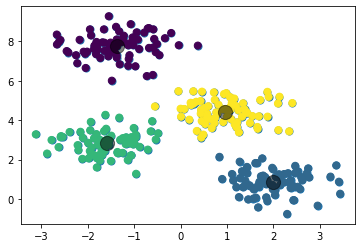

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
print(y_kmeans)


In [8]:
d = {}

a=[[2,4],[6,4],[5,11],[7,1]]
#print(len(a))
for j in range(len(a)):
  b=a[j]
  print(b)
  print(b.index(min(b)))
  #d[str(b.index(min(b)))].append(b) 

print(d)

[2, 4]
0
[6, 4]
1
[5, 11]
0
[7, 1]
1
{}
